In [1]:
import networkx as nx
from os import walk
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

Import the cleaned test as a list, each element is a document or bag of words. Depending on how much the data is cleaned, the distance between words can be used as a parameter for the weight of the edges.

In [2]:
documents=[]
filenames = next(walk("video_data/cleaned_text"), (None, None, []))[2]
filenames
for name in filenames:
    f = open("video_data/cleaned_text/{}".format(name),"r")
    documents.append(list(csv.reader(f, delimiter=" "))[0])
    f.close()
documents

[['terza',
  'media',
  'presidenzialismo',
  'onestamente',
  'sono',
  'però',
  'mi',
  'piace',
  'il',
  'modello',
  'Francia',
  'e',
  'penso',
  'che',
  'sia',
  'giusto',
  'che',
  'sia',
  'il',
  'popolo',
  'a',
  'decidere',
  'che',
  'presenta',
  'Repubblica',
  'poi',
  'in',
  'pensione',
  'a',
  '64',
  'anni',
  'oltre',
  '64',
  'anni',
  'di',
  '74',
  'anni',
  'cioè',
  'bisogno',
  'di',
  'intercambio',
  'sul',
  'mercato',
  'del',
  'lavoro',
  'per',
  'liberare',
  'posti',
  'lavoro',
  'da',
  'dare',
  'più',
  'giovani',
  'e',
  'poi',
  'dopo',
  'che',
  'uno',
  'ha',
  'lavorato',
  'già',
  "vent'anni",
  'più',
  'i',
  'contributi',
  'Come',
  'funziona',
  'le',
  'pensioni',
  'adesso',
  'mi',
  'fa',
  'schifo',
  'però',
  'tanta',
  '4',
  'anni',
  'va',
  'più',
  'che',
  'bene',
  'anche',
  'se',
  'significherà',
  'a',
  'pagare',
  'la',
  'pensione',
  'per',
  'più',
  'anni',
  'poi',
  'combustibili',
  'fossili',
  'e

Build a dictionary of unique words.

In [3]:
voc = []
for doc in documents:
    for x in doc:
        voc.append(x)
voc, word_count = np.unique(voc, return_counts=True)
print(voc)
print(word_count)
tot_words = sum(word_count)

['100%' '12' '14' '19' '2' '4' '5' '6' '64' '7' '74' '9' 'Allora' 'Anche'
 'Arcobaleno' 'Assolutamente' 'CO2' 'Capito' 'Clara' 'Come' 'Comunque'
 'Dario' 'Detto' 'Direi' 'Esteri' 'Europa' 'Francia' 'I' 'Infatti' 'Io'
 'Iris' 'Irpef' 'Italia' 'Italiani' 'Manco' 'No' 'Oggi' 'Ok' 'Onestamente'
 'Ovvero' 'Ovviamente' 'PD' 'PNR' 'Passa' 'Pensavi' 'Per' 'Però' 'Poi'
 'Poverino' 'Quindi' 'Repubblica' 'Rol' 'Serena' 'Sono' 'Stato' 'Sì' 'Tax'
 'Vitale' 'Viviamo' 'Zan' 'a' 'aborto' 'accetta' 'accoglienza' 'accurata'
 'ad' 'addirittura' 'adesso' 'aiuta' 'aiutare' 'aiutarmi' 'aiuto' 'al'
 'alcune' "all'ultimo" 'alla' 'allo' 'allora' 'alto' 'altre' 'altro'
 'alzate' 'amate' 'ambito' 'analisi' 'anche' 'ancora' 'andate' 'andrebbe'
 'andrebbero' 'anni' 'apposta' 'arrivati' 'ascolto' 'assolutamente'
 'assumono' 'aumenta' 'avere' 'avrebbe' 'avrebbero' 'avuto' 'azzerare'
 'bambino' 'basso' 'bene' 'bisogno' 'boh' 'bonus' 'buonisti' "c'entra"
 "c'è" 'cacciano' 'cadere' 'carcere' 'cariche' 'cartella' 'case'

NETWORK BUILDING\
Define each element of the dictionary as a node.

In [4]:
#G = nx.Graph()
#G.add_nodes_from(voc)
#G.number_of_nodes() == len(voc)

Check for each couple of tokens the number of times they appear in the same document and use it (ore some metric tbd) as the weight of the edge.

In [5]:
adj = np.zeros((len(voc),len(voc)))
for i in range(len(voc)):
    for j in range(i+1,len(voc)):
        for doc in documents:
            if ((voc[i] in doc) and (voc[j] in doc)):
                adj[i,j] += 1

print(adj.max())
adj = adj/adj.max()
#adj

4.0


In [6]:
adj_dic = {}
for i in range(len(voc)-1):
    dic_i = {}
    for j in range(i+1,len(voc)):
        if adj[i,j] != 0.:
            dic_i[voc[j]] = {"weight":adj[i,j]}
    adj_dic[voc[i]] = dic_i

In [7]:
adj_dic

{'100%': {'19': {'weight': 0.25},
  '2': {'weight': 0.25},
  'Assolutamente': {'weight': 0.25},
  'Capito': {'weight': 0.25},
  'Comunque': {'weight': 0.25},
  'Iris': {'weight': 0.25},
  'Irpef': {'weight': 0.25},
  'Italiani': {'weight': 0.25},
  'No': {'weight': 0.25},
  'PD': {'weight': 0.25},
  'PNR': {'weight': 0.25},
  'Passa': {'weight': 0.25},
  'Quindi': {'weight': 0.25},
  'Rol': {'weight': 0.25},
  'Sì': {'weight': 0.25},
  'Tax': {'weight': 0.25},
  'a': {'weight': 0.25},
  'accetta': {'weight': 0.25},
  'aiuta': {'weight': 0.25},
  'aiutare': {'weight': 0.25},
  'al': {'weight': 0.25},
  "all'ultimo": {'weight': 0.25},
  'alla': {'weight': 0.25},
  'allora': {'weight': 0.25},
  'alto': {'weight': 0.25},
  'alzate': {'weight': 0.25},
  'anche': {'weight': 0.25},
  'andrebbe': {'weight': 0.25},
  'andrebbero': {'weight': 0.25},
  'apposta': {'weight': 0.25},
  'assolutamente': {'weight': 0.25},
  'aumenta': {'weight': 0.25},
  'avrebbero': {'weight': 0.25},
  'avuto': {'wei

In [8]:
G = nx.Graph(adj_dic)

{('100%', '19'): Text(-0.3392462581396103, -0.6317099332809448, '0.25'),
 ('100%', '2'): Text(-0.18962135538458824, -0.30882456339895725, '0.25'),
 ('100%',
  'Assolutamente'): Text(-0.18792350590229034, -0.3043013009009883, '0.25'),
 ('100%', 'Capito'): Text(-0.3353223204612732, -0.6418479084968567, '0.25'),
 ('100%', 'Comunque'): Text(-0.16482111811637878, -0.5568456649780273, '0.25'),
 ('100%', 'Iris'): Text(-0.25243864208459854, -0.6938738226890564, '0.25'),
 ('100%', 'Irpef'): Text(-0.13812063907971606, -0.6525236666202545, '0.25'),
 ('100%', 'Italiani'): Text(-0.3365032523870468, -0.6994256377220154, '0.25'),
 ('100%', 'No'): Text(-0.19082976505160332, -0.24448547139763832, '0.25'),
 ('100%', 'PD'): Text(-0.37837550044059753, -0.3806745782494545, '0.25'),
 ('100%', 'PNR'): Text(-0.3446890860795975, -0.6224661767482758, '0.25'),
 ('100%', 'Passa'): Text(-0.1674774419516325, -0.6186400055885315, '0.25'),
 ('100%', 'Quindi'): Text(-0.2660036087036133, -0.2578018493950367, '0.25'),
 

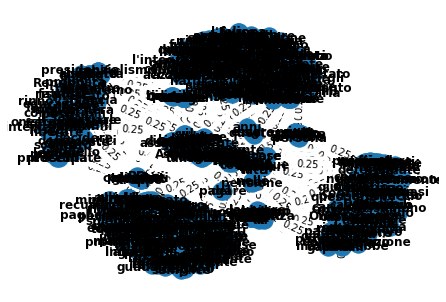

In [9]:
pos=nx.spring_layout(G)
nx.draw(G,with_labels=True, font_weight='bold', pos=pos)
#labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)